In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

config = tf.ConfigProto(
    gpu_options=tf.GPUOptions(
    allow_growth=True
    ))

In [2]:
# 検出したボールとゴールの座標が含まれたデータ

r_path = '../data/LOG_G/detect_ball_goal/stable/'
contents = os.listdir(r_path)
data = pd.DataFrame()
num = 0
for c in range(len(contents)):
    print(r_path+contents[c])
    n_data = pd.read_csv(r_path+contents[c],header=None)
    data = pd.concat([data,n_data])
d = data

../data/LOG_G/detect_ball_goal/stable/log201808211940.csv
../data/LOG_G/detect_ball_goal/stable/log201808211918.csv
../data/LOG_G/detect_ball_goal/stable/log201808211922.csv
../data/LOG_G/detect_ball_goal/stable/log201808211932.csv
../data/LOG_G/detect_ball_goal/stable/log201808211911.csv
../data/LOG_G/detect_ball_goal/stable/log201808211927.csv
../data/LOG_G/detect_ball_goal/stable/log201808211929.csv
../data/LOG_G/detect_ball_goal/stable/log201808211839.csv
../data/LOG_G/detect_ball_goal/stable/log201808211844.csv
../data/LOG_G/detect_ball_goal/stable/log201808211909.csv
../data/LOG_G/detect_ball_goal/stable/log201808211916.csv
../data/LOG_G/detect_ball_goal/stable/log201808201609.csv
../data/LOG_G/detect_ball_goal/stable/log201808211935.csv


In [3]:
# ブレることなくボールをゴールに運んだデータ
'''
target_path = '/home/yota/workspace/Study/m1/data/LOG_G/ConvertData/convData.csv'
data = pd.read_csv(target_path,header=None)

print(data)
d = data
#print(ball)
#print(joy)
'''

"\ntarget_path = '/home/yota/workspace/Study/m1/data/LOG_G/ConvertData/convData.csv'\ndata = pd.read_csv(target_path,header=None)\n\nprint(data)\nd = data\n#print(ball)\n#print(joy)\n"

In [4]:
d.columns = ['d_bx','d_by','d_gx','d_gy','l_bx','l_by','l_p0x','l_p0y','lp1x','l_p1y','g_bx','g_by','g_pole0x','g_pole0y','g_pole1x','g_pole1y','g_px','g_py','g_pth','ljx','ljy','rjx','rjy']
d = d[d.d_bx!=-9999]
print(len(d))

48610


In [5]:
'''
from sklearn.cross_validation import train_test_split
t1 = []
t2 = []
def f1(x,y):
    return y * np.sin(x) + np.square(x)
def f2(x,y):
    return x * np.cos(y) + np.square(y)
for a in range(1000):
    r = np.array([np.random.rand(), np.random.rand()])
    t1.append(r)
    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))
IN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)

IN_train = np.array(IN_train)
IN_test = np.array(IN_test)
TAR_train = np.array(TAR_train)
TAR_test = np.array(TAR_test)
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
print(f1(1,1))
print(f2(1,1))
'''

'\nfrom sklearn.cross_validation import train_test_split\nt1 = []\nt2 = []\ndef f1(x,y):\n    return y * np.sin(x) + np.square(x)\ndef f2(x,y):\n    return x * np.cos(y) + np.square(y)\nfor a in range(1000):\n    r = np.array([np.random.rand(), np.random.rand()])\n    t1.append(r)\n    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))\nIN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)\n\nIN_train = np.array(IN_train)\nIN_test = np.array(IN_test)\nTAR_train = np.array(TAR_train)\nTAR_test = np.array(TAR_test)\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\nprint(f1(1,1))\nprint(f2(1,1))\n'

In [6]:
from sklearn.cross_validation import train_test_split

IN_size = 4
TAR_size = 3
'''
l_ball = np.array(d.iloc[:,0:2])   #  0, 1
l_pole0 = np.array(d.iloc[:,2:4])  #  2, 3
l_pole1 = np.array(d.iloc[:,4:6])  #  4, 5
g_ball = np.array(d.iloc[:,6:8])   #  6, 7
g_pole0 = np.array(d.iloc[:,8:10]) #  8, 9
g_pole1 = np.array(d.iloc[:,10:12])# 10,11
g_pos = np.array(d.iloc[:,12:15])  # 12,13,14
ljoy = np.array(d.iloc[:,15:17])   # 15,16
rjoy = np.array(d.iloc[:,17:19])   # 17,18
'''
d_ball = np.array(d.iloc[:,0:2])   #  0, 1
d_goal = np.array(d.iloc[:,2:4])  #  2, 3
l_ball = np.array(d.iloc[:,4:6])   #  4, 5
l_pole0 = np.array(d.iloc[:,6:8]) #  6, 7
l_pole1 = np.array(d.iloc[:,8:10])# 8,9
g_ball = np.array(d.iloc[:,10:12])   #  10, 11
g_pole0 = np.array(d.iloc[:,12:14]) #  12, 13
g_pole1 = np.array(d.iloc[:,14:16])# 14,15
g_pos = np.array(d.iloc[:,16:19])  # 16,17,18
ljoy = np.array(d.iloc[:,19:21])   # 19,20
rjoy = np.array(d.iloc[:,21:23])   # 21,22

input_d = np.array(d.iloc[:,0:IN_size])
output_d = np.array(d.iloc[:,19:22])
print(input_d.shape)
print(output_d.shape)



IN_train, IN_test, TAR_train, TAR_test = train_test_split(input_d,output_d,test_size=0.1,random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
IN_train = IN_train/1000.0
IN_test = IN_test/1000.0
for t in range(10):
    print(IN_train[t])
'''
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
'''

(48610, 4)
(48610, 3)
[ 1.81412036 -1.11412268  4.57588232  0.20973982]
[ 0.31803189  0.03561865  1.10327991 -0.18445178]
[ 0.34345462 -0.11127771  1.36510132  0.43190771]
[ 0.33366415 -0.04899028  0.76449591 -0.03027165]
[ 0.45189322 -0.10995274  0.33055597 -0.68874585]
[ 0.8086601  -0.15857887  1.33102429 -0.47652402]
[0.60753351 0.07415154 2.34220532 0.88613269]
[0.58855511 0.01609373 2.27665649 0.45585223]
[ 1.68908435 -0.76881323  3.04980469  0.85095789]
[ 0.47049188 -0.07208875  1.81588232  1.01181818]


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\n'

In [7]:
#　初期化
#sess = tf.Session(config=config)
#test_sess = tf.Session(config=config)

INPUT = tf.placeholder(shape=[None, IN_size], dtype=tf.float32)
TARGET = tf.placeholder(shape=[None, TAR_size], dtype=tf.float32)

In [8]:
#hidden_size = [100]
hidden_size = [30,8]
batch_size = 100
iter_size = 200000

#　隠れ層の作成 （last layerに直結）
weights = []
biases = []
layers = []
tmp_size = IN_size
last_layer = INPUT
for hsize in hidden_size:
    weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, hsize])))
    biases.append(tf.Variable(tf.random_normal(shape=[hsize])))
    layers.append(tf.nn.relu(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))) # 活性化関数
    tmp_size = hsize
    last_layer = layers[-1]
    print(layers[-1])
#　出力層
weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, TAR_size])))
biases.append(tf.Variable(tf.random_normal(shape=[TAR_size])))
layers.append(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))
final_output = layers[-1]
print(final_output)

Tensor("Relu:0", shape=(?, 30), dtype=float32)
Tensor("Relu_1:0", shape=(?, 8), dtype=float32)
Tensor("Add_2:0", shape=(?, 3), dtype=float32)


In [9]:
sess = tf.Session(config=config)
test_sess = tf.Session(config=config)

In [10]:
'''
# 重みのrestore
saver = tf.train.Saver()
sess = tf.Session(config=config)
test_sess = tf.Session(config=config)
init = tf.global_variables_initializer()
sess.run(init)
test_sess.run(init)
ckpt = tf.train.get_checkpoint_state('./')
if ckpt == None:
    print('!!!!!!!WEIGHTS NOT FOUND!!!!!!')

saver.restore(sess, './model.ckpt')
saver.restore(test_sess, './model.ckpt')
'''

"\n# 重みのrestore\nsaver = tf.train.Saver()\nsess = tf.Session(config=config)\ntest_sess = tf.Session(config=config)\ninit = tf.global_variables_initializer()\nsess.run(init)\ntest_sess.run(init)\nckpt = tf.train.get_checkpoint_state('./')\nif ckpt == None:\n    print('!!!!!!!WEIGHTS NOT FOUND!!!!!!')\n\nsaver.restore(sess, './model.ckpt')\nsaver.restore(test_sess, './model.ckpt')\n"

In [11]:
#　学習
loss = tf.losses.mean_squared_error(TARGET,final_output)
test_loss = tf.losses.mean_squared_error(TARGET,final_output)
opt = tf.train.AdamOptimizer(0.001)
#opt = tf.train.GradientDescentOptimizer(0.01)
train_step = opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)
test_sess.run(init)
loss_vec=[]
test_loss_vec=[]
for i in range(iter_size):
    train_rand_index = np.random.choice(len(IN_train), size=batch_size,replace=False)
    train_rand_in = IN_train[train_rand_index]
    train_rand_tar = TAR_train[train_rand_index]
    sess.run(train_step, feed_dict={INPUT:train_rand_in, TARGET: train_rand_tar})
    loss_vec.append(sess.run(loss, feed_dict={INPUT:train_rand_in, TARGET: train_rand_tar}))
    
    test_rand_index = np.random.choice(len(IN_test), size=batch_size,replace=False)
    test_rand_in = IN_test[test_rand_index]
    test_rand_tar = TAR_test[test_rand_index]
    test_sess.run(train_step, feed_dict={INPUT:test_rand_in, TARGET: test_rand_tar})
    test_loss_vec.append(test_sess.run(test_loss, feed_dict={INPUT:test_rand_in, TARGET: test_rand_tar}))
    
    if (i+1)%100==0:
#        print(sess.run(INPUT, feed_dict={INPUT:rand_in, TARGET: rand_tar}))
        print('Generation:'+str(i+1)+', Loss = '+str(loss_vec[-1]))

Generation:100, Loss = 342.88254
Generation:200, Loss = 57.383495
Generation:300, Loss = 15.57359
Generation:400, Loss = 4.823582
Generation:500, Loss = 5.217245
Generation:600, Loss = 4.6176124
Generation:700, Loss = 4.199567
Generation:800, Loss = 4.7698193
Generation:900, Loss = 2.9161634
Generation:1000, Loss = 3.5063891
Generation:1100, Loss = 2.8910968
Generation:1200, Loss = 3.270774
Generation:1300, Loss = 1.9438279
Generation:1400, Loss = 1.7222978
Generation:1500, Loss = 1.6413764
Generation:1600, Loss = 2.3996956
Generation:1700, Loss = 1.114328
Generation:1800, Loss = 1.2780939
Generation:1900, Loss = 1.1138668
Generation:2000, Loss = 1.2338787
Generation:2100, Loss = 0.51784426
Generation:2200, Loss = 0.40977883
Generation:2300, Loss = 0.42946702
Generation:2400, Loss = 0.41019604
Generation:2500, Loss = 0.23268056
Generation:2600, Loss = 0.17625946
Generation:2700, Loss = 0.15189391
Generation:2800, Loss = 0.122828074
Generation:2900, Loss = 0.111406654
Generation:3000, L

Generation:23000, Loss = 0.042560082
Generation:23100, Loss = 0.040424615
Generation:23200, Loss = 0.040734105
Generation:23300, Loss = 0.046449598
Generation:23400, Loss = 0.04289279
Generation:23500, Loss = 0.043474164
Generation:23600, Loss = 0.03880827
Generation:23700, Loss = 0.03715577
Generation:23800, Loss = 0.041832194
Generation:23900, Loss = 0.034103896
Generation:24000, Loss = 0.0436715
Generation:24100, Loss = 0.042602655
Generation:24200, Loss = 0.036452588
Generation:24300, Loss = 0.040898215
Generation:24400, Loss = 0.042407613
Generation:24500, Loss = 0.037249614
Generation:24600, Loss = 0.041912258
Generation:24700, Loss = 0.04525649
Generation:24800, Loss = 0.038740877
Generation:24900, Loss = 0.048769105
Generation:25000, Loss = 0.042807303
Generation:25100, Loss = 0.044518545
Generation:25200, Loss = 0.039278794
Generation:25300, Loss = 0.043470938
Generation:25400, Loss = 0.03940435
Generation:25500, Loss = 0.044103634
Generation:25600, Loss = 0.03852482
Generatio

Generation:45400, Loss = 0.037709597
Generation:45500, Loss = 0.03353872
Generation:45600, Loss = 0.033977643
Generation:45700, Loss = 0.03121111
Generation:45800, Loss = 0.035939
Generation:45900, Loss = 0.029691156
Generation:46000, Loss = 0.03560191
Generation:46100, Loss = 0.034519337
Generation:46200, Loss = 0.036708243
Generation:46300, Loss = 0.033363663
Generation:46400, Loss = 0.046826415
Generation:46500, Loss = 0.036261942
Generation:46600, Loss = 0.04126771
Generation:46700, Loss = 0.033973835
Generation:46800, Loss = 0.03511031
Generation:46900, Loss = 0.027909262
Generation:47000, Loss = 0.03733088
Generation:47100, Loss = 0.035818696
Generation:47200, Loss = 0.039404366
Generation:47300, Loss = 0.032346975
Generation:47400, Loss = 0.03315277
Generation:47500, Loss = 0.0336796
Generation:47600, Loss = 0.034405686
Generation:47700, Loss = 0.034106575
Generation:47800, Loss = 0.03142368
Generation:47900, Loss = 0.038192216
Generation:48000, Loss = 0.03215287
Generation:4810

Generation:67900, Loss = 0.043858837
Generation:68000, Loss = 0.03367492
Generation:68100, Loss = 0.027950687
Generation:68200, Loss = 0.036184404
Generation:68300, Loss = 0.03793908
Generation:68400, Loss = 0.039374128
Generation:68500, Loss = 0.03710415
Generation:68600, Loss = 0.032419108
Generation:68700, Loss = 0.03431857
Generation:68800, Loss = 0.0316775
Generation:68900, Loss = 0.034299843
Generation:69000, Loss = 0.036528014
Generation:69100, Loss = 0.032533493
Generation:69200, Loss = 0.03851332
Generation:69300, Loss = 0.03401755
Generation:69400, Loss = 0.04260956
Generation:69500, Loss = 0.040432785
Generation:69600, Loss = 0.028798932
Generation:69700, Loss = 0.038369227
Generation:69800, Loss = 0.036300045
Generation:69900, Loss = 0.03302821
Generation:70000, Loss = 0.041852135
Generation:70100, Loss = 0.035630148
Generation:70200, Loss = 0.05457845
Generation:70300, Loss = 0.030056689
Generation:70400, Loss = 0.03788525
Generation:70500, Loss = 0.03812181
Generation:706

Generation:90300, Loss = 0.039749805
Generation:90400, Loss = 0.027918968
Generation:90500, Loss = 0.03093888
Generation:90600, Loss = 0.034883533
Generation:90700, Loss = 0.0348658
Generation:90800, Loss = 0.04282652
Generation:90900, Loss = 0.0338826
Generation:91000, Loss = 0.037597407
Generation:91100, Loss = 0.03602199
Generation:91200, Loss = 0.03488918
Generation:91300, Loss = 0.0282971
Generation:91400, Loss = 0.032071266
Generation:91500, Loss = 0.03545785
Generation:91600, Loss = 0.037405737
Generation:91700, Loss = 0.0373366
Generation:91800, Loss = 0.043295648
Generation:91900, Loss = 0.03781011
Generation:92000, Loss = 0.03638361
Generation:92100, Loss = 0.031172918
Generation:92200, Loss = 0.038669143
Generation:92300, Loss = 0.032847468
Generation:92400, Loss = 0.04321639
Generation:92500, Loss = 0.037761483
Generation:92600, Loss = 0.037529595
Generation:92700, Loss = 0.03145432
Generation:92800, Loss = 0.040176265
Generation:92900, Loss = 0.035541624
Generation:93000, 

Generation:112400, Loss = 0.030518776
Generation:112500, Loss = 0.033953644
Generation:112600, Loss = 0.030010141
Generation:112700, Loss = 0.031220833
Generation:112800, Loss = 0.03322754
Generation:112900, Loss = 0.03493993
Generation:113000, Loss = 0.035632096
Generation:113100, Loss = 0.035757165
Generation:113200, Loss = 0.036463924
Generation:113300, Loss = 0.034165934
Generation:113400, Loss = 0.035085402
Generation:113500, Loss = 0.026383787
Generation:113600, Loss = 0.03449076
Generation:113700, Loss = 0.033124268
Generation:113800, Loss = 0.022826336
Generation:113900, Loss = 0.029179128
Generation:114000, Loss = 0.03598869
Generation:114100, Loss = 0.034367766
Generation:114200, Loss = 0.031464186
Generation:114300, Loss = 0.039067063
Generation:114400, Loss = 0.03077081
Generation:114500, Loss = 0.026845245
Generation:114600, Loss = 0.033113346
Generation:114700, Loss = 0.032859523
Generation:114800, Loss = 0.02548819
Generation:114900, Loss = 0.026116377
Generation:115000,

Generation:134200, Loss = 0.03617524
Generation:134300, Loss = 0.02780514
Generation:134400, Loss = 0.034862913
Generation:134500, Loss = 0.034472458
Generation:134600, Loss = 0.029209312
Generation:134700, Loss = 0.037217006
Generation:134800, Loss = 0.032546464
Generation:134900, Loss = 0.029670445
Generation:135000, Loss = 0.030526396
Generation:135100, Loss = 0.024963574
Generation:135200, Loss = 0.033778034
Generation:135300, Loss = 0.030770797
Generation:135400, Loss = 0.034097504
Generation:135500, Loss = 0.032843847
Generation:135600, Loss = 0.025113693
Generation:135700, Loss = 0.034125865
Generation:135800, Loss = 0.034513097
Generation:135900, Loss = 0.029178727
Generation:136000, Loss = 0.03131248
Generation:136100, Loss = 0.029093917
Generation:136200, Loss = 0.043311026
Generation:136300, Loss = 0.036972918
Generation:136400, Loss = 0.030886265
Generation:136500, Loss = 0.039991155
Generation:136600, Loss = 0.029936755
Generation:136700, Loss = 0.0352458
Generation:136800

Generation:156000, Loss = 0.032012757
Generation:156100, Loss = 0.038032115
Generation:156200, Loss = 0.031458665
Generation:156300, Loss = 0.038481686
Generation:156400, Loss = 0.032876514
Generation:156500, Loss = 0.041400377
Generation:156600, Loss = 0.034473754
Generation:156700, Loss = 0.032353442
Generation:156800, Loss = 0.03208072
Generation:156900, Loss = 0.038686216
Generation:157000, Loss = 0.031400062
Generation:157100, Loss = 0.0296604
Generation:157200, Loss = 0.027552446
Generation:157300, Loss = 0.03164452
Generation:157400, Loss = 0.029815318
Generation:157500, Loss = 0.03408352
Generation:157600, Loss = 0.035963014
Generation:157700, Loss = 0.027108727
Generation:157800, Loss = 0.033636007
Generation:157900, Loss = 0.030189034
Generation:158000, Loss = 0.031117175
Generation:158100, Loss = 0.033170335
Generation:158200, Loss = 0.02312134
Generation:158300, Loss = 0.033292823
Generation:158400, Loss = 0.028676528
Generation:158500, Loss = 0.031919185
Generation:158600,

Generation:177800, Loss = 0.032480728
Generation:177900, Loss = 0.033502676
Generation:178000, Loss = 0.028516548
Generation:178100, Loss = 0.038492814
Generation:178200, Loss = 0.027514607
Generation:178300, Loss = 0.031323045
Generation:178400, Loss = 0.023624897
Generation:178500, Loss = 0.034444116
Generation:178600, Loss = 0.034880627
Generation:178700, Loss = 0.02705836
Generation:178800, Loss = 0.028563647
Generation:178900, Loss = 0.029604632
Generation:179000, Loss = 0.02888472
Generation:179100, Loss = 0.030751022
Generation:179200, Loss = 0.026642354
Generation:179300, Loss = 0.03404037
Generation:179400, Loss = 0.028395202
Generation:179500, Loss = 0.031534914
Generation:179600, Loss = 0.032142613
Generation:179700, Loss = 0.032456886
Generation:179800, Loss = 0.03322851
Generation:179900, Loss = 0.026039032
Generation:180000, Loss = 0.027214034
Generation:180100, Loss = 0.025045075
Generation:180200, Loss = 0.028182557
Generation:180300, Loss = 0.032442916
Generation:18040

Generation:199500, Loss = 0.030999156
Generation:199600, Loss = 0.031299997
Generation:199700, Loss = 0.030989794
Generation:199800, Loss = 0.03324152
Generation:199900, Loss = 0.029310659
Generation:200000, Loss = 0.027529618


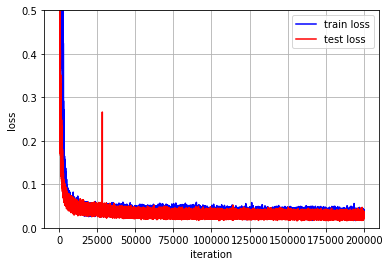

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()
plt.plot(loss_vec,c='b',linestyle='solid',label='train loss')
plt.plot(test_loss_vec,c='r',label='test loss')

#plt.xlim(60000,60100)
plt.ylim(0,0.5)
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.savefig(str(hidden_size)+'.png')
plt.legend()


#print(test_loss_vec[99999])
#print(test_loss_vec[99999])

In [13]:
# 重みの保存
saver = tf.train.Saver()
saver.save(sess, './model.ckpt')


'./model.ckpt'

In [14]:
'''
# ボール座標とスティックの傾きプロット
by_max=IN_train.max(axis=0)[1]
by_min=IN_train.min(axis=0)[1]

ball_y = np.array(range(int(by_min)-3,int(by_max)+3))
for i in range(len(ball_y)):
    
    ball = np.array([[6.0, ball_y[i]/10.0]])
    
    print(ball)
    joy = sess.run(final_output, feed_dict={INPUT: ball})
    plt.scatter(ball[0][1],ball[0][0], s=200, c='orange')
    
    plt.quiver(0,0,-joy[0][0],-joy[0][1],angles="xy",scale_units="xy",scale=1)
    #plt.quiver(0,0,-0.6,5,angles="xy",scale_units="xy",scale=1)
    print(joy)
    plt.savefig(str(hidden_size)+'_img'+'.png')
    '''

'\n# ボール座標とスティックの傾きプロット\nby_max=IN_train.max(axis=0)[1]\nby_min=IN_train.min(axis=0)[1]\n\nball_y = np.array(range(int(by_min)-3,int(by_max)+3))\nfor i in range(len(ball_y)):\n    \n    ball = np.array([[6.0, ball_y[i]/10.0]])\n    \n    print(ball)\n    joy = sess.run(final_output, feed_dict={INPUT: ball})\n    plt.scatter(ball[0][1],ball[0][0], s=200, c=\'orange\')\n    \n    plt.quiver(0,0,-joy[0][0],-joy[0][1],angles="xy",scale_units="xy",scale=1)\n    #plt.quiver(0,0,-0.6,5,angles="xy",scale_units="xy",scale=1)\n    print(joy)\n    plt.savefig(str(hidden_size)+\'_img\'+\'.png\')\n    '

In [15]:
# 重みのrestore
predicts_sess = tf.Session(config=config)
ckpt = tf.train.get_checkpoint_state('./')
if ckpt == None:
    print('!!!!!!!WEIGHTS NOT FOUND!!!!!!')

saver.restore(predicts_sess, './model.ckpt')

INFO:tensorflow:Restoring parameters from ./model.ckpt
